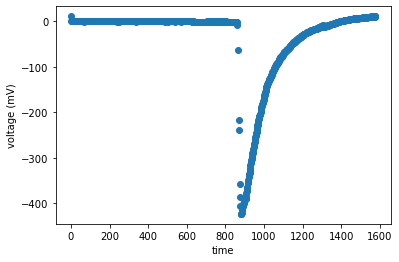

In [46]:
import matplotlib.pyplot as plt
import pylab
import numpy as np


with open("nearLEDdata.txt") as f:
    events = f.read().split('-- Event')


lines = events[449].split('\n')
time = []
voltage = []
for line in lines[4:1028]:
        
    values = line.split()
    time.append(float(values[2]))
    voltage.append(float(values[3]))
    
plt.scatter(time,voltage)
plt.xlabel('time')
plt.ylabel('voltage (mV)')
plt.show()
    


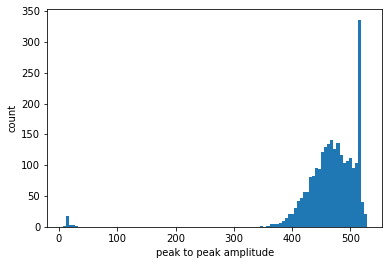

Average:
466.0634562029324
57.38484766420038
2523


In [51]:
with open("nearLEDdata.txt") as f:
    events = f.read().split('-- Event')

peaktopeak = []    
    
for event in events:
    lines = event.split('\n')
    maxvoltage = -100000;
    minvoltage = 100000;

    for line in lines[4:1028]:
        values = line.split()
        

        if float(values[3]) < minvoltage:
            minvoltage = float(values[3])
        if float(values[3]) > maxvoltage:
            maxvoltage = float(values[3])
    if maxvoltage - minvoltage > 0 and maxvoltage - minvoltage < 10000:
        peaktopeak.append(maxvoltage - minvoltage)
    #if maxvoltage - minvoltage > 540:
     #   print(events.index(event))
plt.hist(peaktopeak, 100)
plt.xlabel('peak to peak amplitude')
plt.ylabel('count')
plt.show()
plt.show()
print("Average:")
print(sum(peaktopeak) / len(peaktopeak))
print(np.std(peaktopeak))
print(len(peaktopeak))

<ErrorbarContainer object of 3 artists>

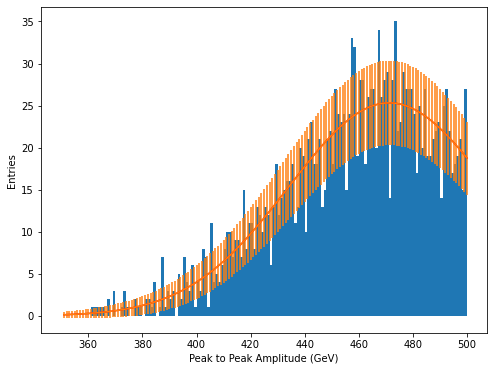

In [59]:
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
fig = plt.figure( figsize=(8, 6), facecolor='w')
hist_data, bins, patches = plt.hist(peaktopeak, bins=500 - 350, range=[350, 500])
x = np.linspace(bins[1], bins[-1], 500 - 350)
y = hist_data
popt, pcov = curve_fit(gaussian, x, y, p0=(37.975, 471.53, 37.158))
resolution = peaktopeak
y = gaussian(x, *popt)
plt.plot(x, y, color='r')
plt.xlabel('Peak to Peak Amplitude (GeV)')
plt.ylabel('Entries')
plt.errorbar(x,y,yerr=np.sqrt(y))